In [2]:
# This file contains a comparison between KNN, Decision Tree and Random Forest Classifier Algorithms, applied on Income Classification Dataset
# to predict if a person makes over 50K a year. It also highlights which algorithm gives a better prediction based on accuracy scores.

# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# To read CSV data
data = pd.read_csv("C:/Users/Aditi Arora/Documents/FORE/Trimester 3/MLP/archive/income_evaluation.csv")

In [3]:
# Preview data
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# removing redundant spaces from column names
data.columns = list(map(lambda a: a.lstrip(), data.columns))

In [5]:
if data.isnull().any().any():
    print("There are some missing values in the data.")
else:
    print("There are no missing values in the data.")

There are no missing values in the data.


In [6]:
# The 'fnlwgt' variable is a weight that is given by the researcher arbitrarily.
# The 'education' variable and the 'education-num' variable seem to correspond to each other one-to-one. Hence, dropping them.
data.drop(['fnlwgt', 'education'], axis=1, inplace=True)
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# <=50K = 0, >50K = 1
data['income'] = data['income'].replace({' <=50K':0, ' >50K':1})
data.head(30)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [10]:
income = data.income.value_counts()
income

0    24720
1     7841
Name: income, dtype: int64

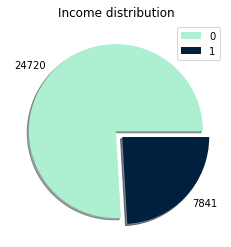

In [11]:
colors = ['#ADEFD1FF', '#00203FFF']
explode = [0, 0.1]
plt.pie(income, labels=income.values, colors=colors, explode = explode, shadow=True)
plt.title('Income distribution')
plt.legend(labels=income.index)

In [12]:
# checking types of variables
data.dtypes

age                int64
workclass         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [14]:
# object type variables cannot be included in a correlation heatmap, hence dropping them
stats = data.select_dtypes(['float', 'int64']).drop(columns=['income'])

<AxesSubplot:>

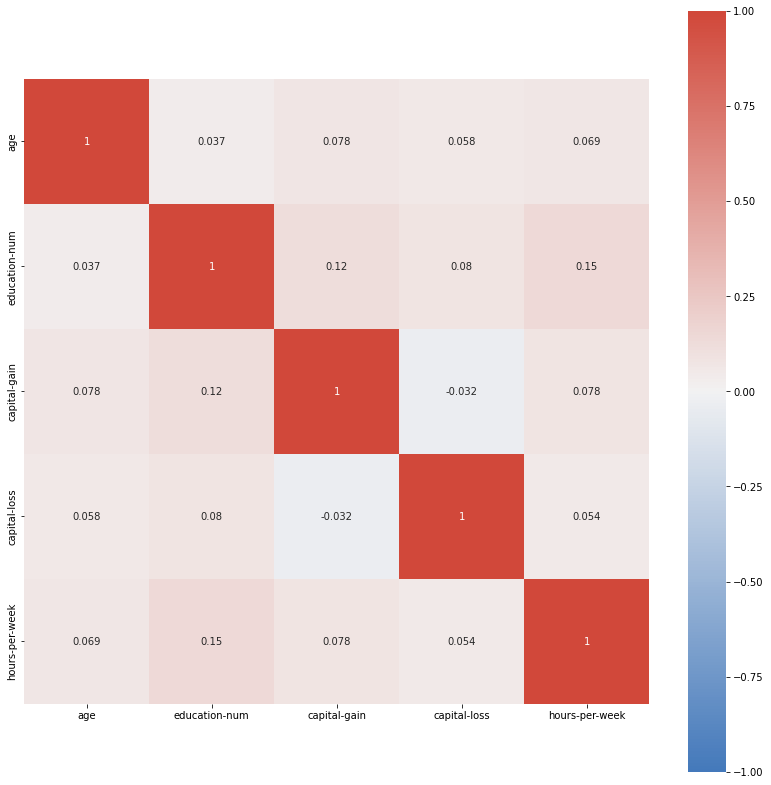

In [15]:
fig = plt.figure(figsize=(14,14))
corr = stats.corr()
sns.heatmap(corr,
            vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(h_neg=250, h_pos=15, as_cmap=True),
            square=True, annot=True)

In [29]:
num_atr=['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

cat_atr=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

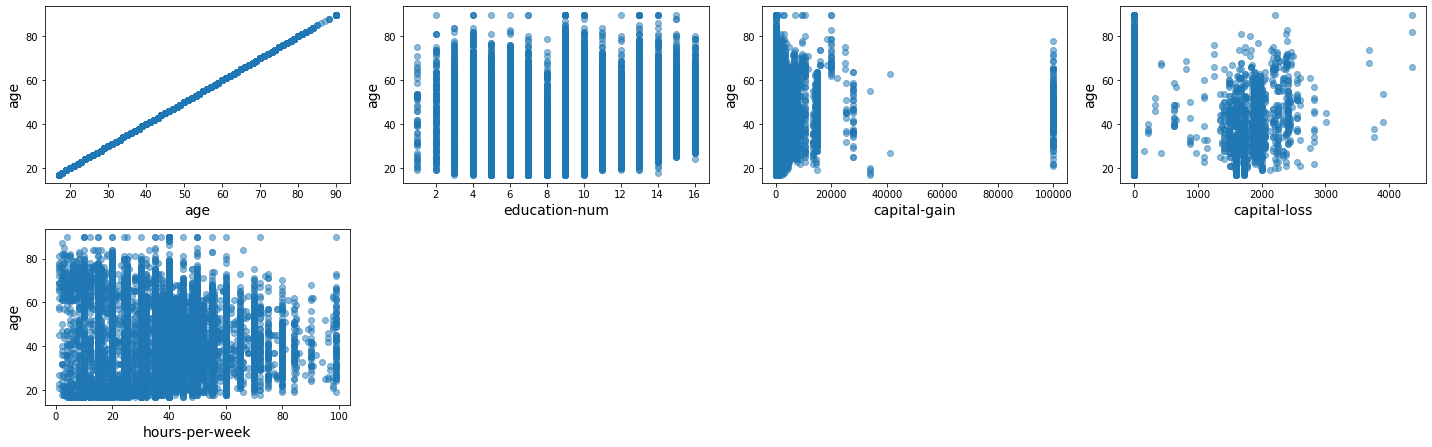

In [31]:
plt.figure(figsize=(20,12))
x=1
for i in num_atr:
    plt.subplot(4,4,x)
    plt.scatter(data=data,y='age',x=i,alpha=0.5)
    plt.ylabel('age',fontsize=14)
    plt.xlabel(i,fontsize=14)
    plt.tight_layout()
    x=x+1

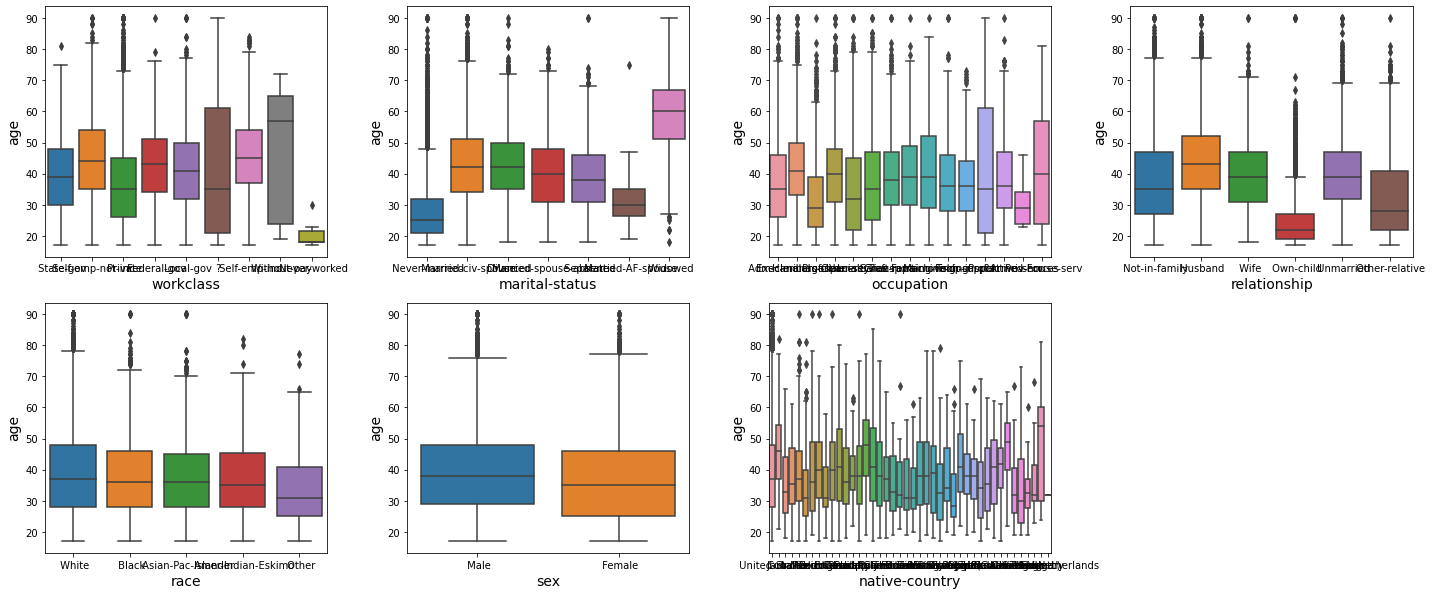

In [30]:
plt.figure(figsize=(20,12))
x=1
for i in cat_atr:
    plt.subplot(3,4,x)
    sns.boxplot(data=data,y='age',x=i)
    plt.ylabel('age',fontsize=14)
    plt.xlabel(i,fontsize=14)
    plt.tight_layout()
    x=x+1
plt.show()

In [19]:
for column in data.columns:
    data[column].replace(' ?', np.NaN, inplace=True)
    
data.head(30)    

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [21]:
# Adjustments to missing values
train_data = data.copy()
train_data['workclass'].fillna(train_data['workclass'].value_counts().idxmax(), inplace=True)
train_data['occupation'].fillna(train_data['occupation'].value_counts().idxmax(), inplace=True)
train_data['native-country'].fillna(train_data['native-country'].value_counts().idxmax(), inplace=True)

In [22]:
# Preview data
train_data.head(30)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [26]:
final_data = pd.get_dummies(train_data)
final_data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# KNN Classifier
# Separate feature and target
X = final_data.drop(columns=['income'])
y = final_data['income']

In [28]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
X.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [33]:
y_pred = knn.predict(X_test)

In [34]:
# Model Accuracy
knnAcc = knn.score(X_test, y_test)
print("Accuracy is %.2f%%" %(knnAcc*100))

Accuracy is 85.52%


In [39]:
# Decision Tree Classifier
# Separate feature and target
X = final_data.drop(columns=['income'])
y = final_data['income']

In [40]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) # 70% training and 30% test

In [41]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)
print("y_pred: \n", y_pred)
print("y_test: \n", y_test)

y_pred: 
 [0 0 1 ... 0 0 0]
y_test: 
 9646     0
709      0
7385     1
16671    0
21932    0
        ..
29663    1
29310    0
29661    0
19491    0
2861     0
Name: income, Length: 9769, dtype: int64


In [42]:
# Model Accuracy
dtAcc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy is %.2f%%" %(dtAcc*100))

Accuracy is 84.83%


In [43]:
print(confusion_matrix(y_test, y_pred))

[[7142  408]
 [1074 1145]]


In [44]:
f1_score(y_test, y_pred)

0.6071049840933191

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7550
           1       0.74      0.52      0.61      2219

    accuracy                           0.85      9769
   macro avg       0.80      0.73      0.76      9769
weighted avg       0.84      0.85      0.84      9769



In [46]:
# Random Forest Classifier
# split into inputs and outputs
X = final_data.drop(columns=['income'])
y = final_data['income']
print(X.shape, y.shape)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32561, 88) (32561,)
(21815, 88) (10746, 88) (21815,) (10746,)


In [48]:
# fit the model
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
# make predictions
y_pred = model.predict(X_test)
print(y_pred.shape)
print("y_pred: \n", y_pred)
print("y_test: \n", y_test)

(10746,)
y_pred: 
 [0 0 1 ... 0 0 0]
y_test: 
 9646     0
709      0
7385     1
16671    0
21932    0
        ..
31102    0
13393    0
9475     0
22531    0
26550    0
Name: income, Length: 10746, dtype: int64


In [49]:
# evaluate predictions
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae)
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)

MAE: 0.147
MSE: 0.147


In [50]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
rfAcc = accuracy_score(y_test, y_pred)
print("Accuracy is %.2f%%" %(rfAcc*100))

[[7636  677]
 [ 903 1530]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      8313
           1       0.69      0.63      0.66      2433

    accuracy                           0.85     10746
   macro avg       0.79      0.77      0.78     10746
weighted avg       0.85      0.85      0.85     10746

Accuracy is 85.30%


In [51]:
# Comparison between KNN, Decision Tree & Random Forest Classifier
if(dtAcc >= knnAcc):
    if(dtAcc >= rfAcc):
        {print('Decision Tree Classifier is the best with an accuracy score of %.2f%%' %(dtAcc*100))}
        
    else:
        {print('Random Forest Classifier is the best with an accuracy score of %.2f%%' %(rfAcc*100))}
        
else:
    if(knnAcc >= rfAcc):
        {print('KNN Classifier is the best with an accuracy score of %.2f%%' %(knnAcc*100))}
        
    else:
        {print('Random Forest Classifier is the best with an accuracy score of %.2f%%' %(rfAcc*100))}

KNN Classifier is the best with an accuracy score of 85.52%
